In [1]:
from scipy import stats
import pandas as pd
import seaborn as sns

In [2]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

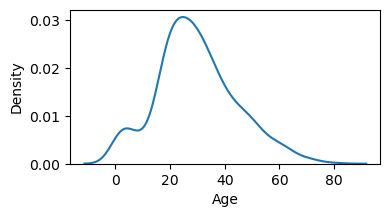

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,2))
sns.kdeplot(data = titanic, x = 'Age')

In [4]:
## 정규성을 가지는 데이터  rand(0~1)사이의 값을 랜덤하게  // randn(음수도 포함 ) 평균이 0이가 표준편차가 1인 표준정규분포를 따르는 데이터를 랜덤하게 뽑아준다.  
import numpy as np
arr = np.random.randn(100)

<Axes: ylabel='Density'>

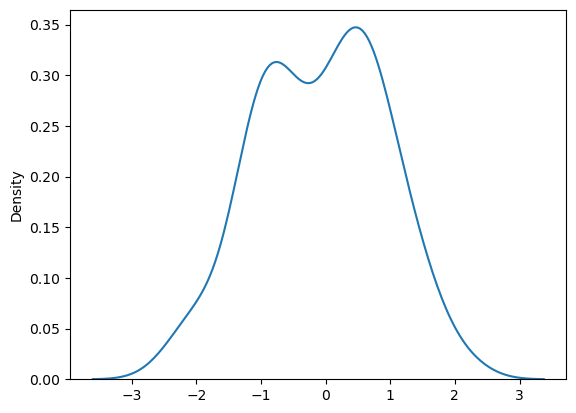

In [5]:
sns.kdeplot(x = arr)

In [6]:
from scipy import stats   # 사이언스 파이선 : 과학관련 함수가 들어있음 통계가 들어있는 이유는 모름 ㅋㅋ 
stats.shapiro(titanic['Fare'])  ## shapiro 라는 사람이 만듦. 함수의 역할 : 데이터를 입력받으면 데이터를 가지고 정규성을 가지는지 확인 해준다. 
## 귀무가설: 정규설을 가진다, 대립가설: 정규성을 가지지 않는다. 

ShapiroResult(statistic=0.5218917727470398, pvalue=1.0789998175301091e-43)

1 . p_values = 유의확률 값 : 이 통계값(statistic=0.5218917727470398)이 나올 확률값 (6% 7% 0.05보다 커지면 앞의 값을 믿을 수가 없다. 0.05보다 작으면 믿을 수 있다. )
2 . statistic=0.5218917727470398이 0.52 ~~ 는 너무 작아 정규성을 가진다고 할 수 없다. 0.9~ 정도는 되야 정규성을 가진다고 판단할 수 있다. 

In [7]:
## p_value 가 유의수준 (0.05)보다 작으면 대립가설 채택
## p_value 가 유의수준 (0.05)보다 크면 대립가설 기각, 귀무가설 참


In [8]:
stats.shapiro(arr) ## pvalue 가 0.05보다 크다 = 귀무가설이 참 

ShapiroResult(statistic=0.9844364523887634, pvalue=0.28901684284210205)

In [9]:
 ## 정상적 계산이 안됨. nan값이 들어가 있기 때문에  nan값을 없애기 위해 dropna/fillna 를 사용
stats.shapiro(titanic['Age'].dropna())  
# = 정규성을 가지지 않는다. 

ShapiroResult(statistic=0.981458306312561, pvalue=7.340329943872348e-08)

In [10]:
stats.anderson(titanic['Fare'])

AndersonResult(statistic=122.16962721459197, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=32.204207968574636, scale=49.693428597180905)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [11]:
stats.anderson(titanic['Age'].dropna())

AndersonResult(statistic=3.8230373853616584, critical_values=array([0.573, 0.652, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=29.69911764705882, scale=14.526497332334044)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [12]:
stats.anderson(arr) ## 5000개 기준으로 아래는 샤피로 위로는 앤더슨 

AndersonResult(statistic=0.610168164510938, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-0.07826968177265173, scale=0.9906885754273077)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [13]:
stats.kstest(titanic['Fare'] ,'norm') ## pvalue=0.0 정규성을 가지지 않는다 . 

KstestResult(statistic=0.9831349436254704, pvalue=0.0, statistic_location=4.0125, statistic_sign=-1)

2교시 
이변량 데이터 분석
연속형이냐 == 수치형이냐 

In [14]:
air = pd.read_csv('data/ozone.csv')
air.head() 

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


In [15]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    int64  
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Date     153 non-null    object 
dtypes: float64(2), int64(2), object(1)
memory usage: 6.1+ KB


In [16]:
air = air.dropna()

<Axes: xlabel='Temp', ylabel='Ozone'>

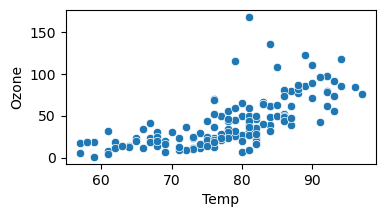

In [17]:
plt.figure(figsize=(4,2))
sns.scatterplot(data = air, x ='Temp'  ,y= 'Ozone')

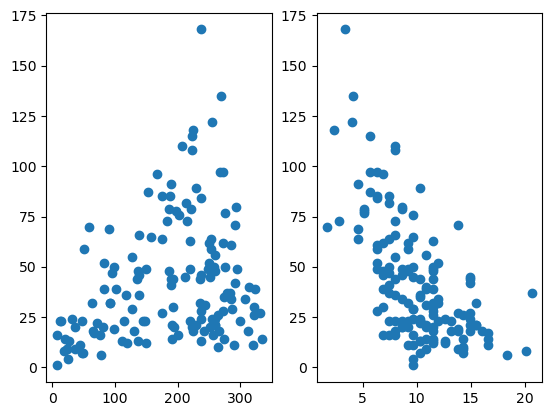

In [18]:
plt.subplot(1,2,1)
plt.scatter('Solar.R', 'Ozone', data=air)
plt.subplot(1,2,2)
plt.scatter('Wind', 'Ozone', data=air)

In [19]:
stats.pearsonr(air['Temp'], air['Ozone'])
# 귀무가설 : 두 데이터 간의 연관성이 없다.
# 대립가서 : 두 데이터 간의 연관성이 있다.

PearsonRResult(statistic=0.6848215299658289, pvalue=1.5526495812046307e-21)

In [20]:
# 위 결과의 해설
# p_value 값이 0.05보다 작으므로 대립가설이 채택 = 대립가설인 두 데이터간의 연관성이 있다. 
# >>그 때의 통계량을 보면 0.685 정도 이므로 어느정도 상관관계가 있는 편이다.

In [21]:
##PearsonRResult(statistic=0.6848215299658289, pvalue=1.5526495812046307e-21)
                 # 통계검정값  / 상관계수0.5 이상이고 pvalue는 0.05보다 작으니 상관관계가 있다 

In [22]:
## 귀무가설 == 차이가 없다, 연관성이 없다, 관련이 없다. 
## 대립가설==차이가 있다, 연관성이 있다, 관련이 있다   

In [23]:
stats.pearsonr(air['Solar.R'], air['Ozone'])


PearsonRResult(statistic=0.2800681334905376, pvalue=0.0006175878788566504)

In [24]:
#PearsonRResult(statistic=0.2800681334905376, pvalue=0.0006175878788566504)
#                 상관 계수가 0.28로 양의 상관 관계가 있으며, p-value가 매우 작은 값이므로 이 상관 관계는 통계적으로 유의미하다
# p밸류가 작으면 이때 statistic을 확인!!!! 피어슨 상관 계수의 유의성을 검정하는 p-value!! p-value는 유의성검정도구이다! 

In [25]:
# statistic=0.2800681334905376 == 1에 가까울수록 정규성을 띈다 >>연관성이 크지 않다


In [26]:
stats.pearsonr(air['Solar.R'], air['Wind'])

PearsonRResult(statistic=-0.05679166576984669, pvalue=0.49595520681512717)

In [27]:
# 상관계수가 0이면 귀무가설!!!

In [28]:
corr = air.corr(numeric_only=True)  # 상관계수를 의미 다 표시해준다. 편해진다 계산 

<Axes: >

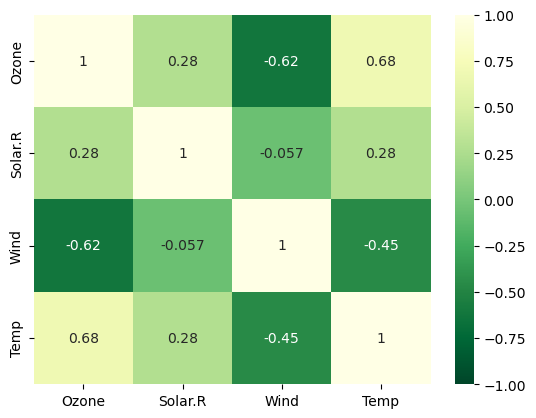

In [29]:
sns.heatmap(corr, annot=True ,vmax = 1, vmin = -1 , cmap = 'YlGn_r')
                    # 숫자를 네모칸 안에 넣는 함수 

In [30]:
pd.crosstab(titanic['Sex'], titanic['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [31]:
pd.crosstab(titanic['Sex'], titanic['Survived'],normalize='index') ## 비율계산  행 기준 

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [32]:
pd.crosstab(titanic['Sex'], titanic['Survived'],normalize='columns')  ## 열 기준 비율 계산 = 생존한 사람중에 여성과 남성 비율 

Survived,0,1
Sex,,
female,0.147541,0.681287
male,0.852459,0.318713


In [33]:
pd.crosstab(titanic['Sex'], titanic['Survived'],normalize='all')

Survived,0,1
Sex,,
female,0.090909,0.261504
male,0.525253,0.122334


<Axes: xlabel='Survived'>

<Figure size 400x200 with 0 Axes>

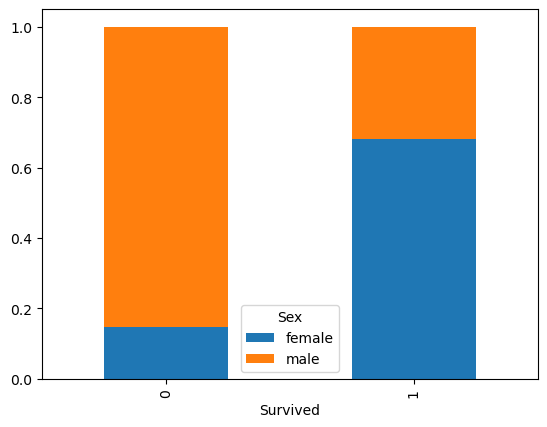

In [35]:
plt.figure(figsize=(4,2))
ct = pd.crosstab(titanic['Sex'], titanic['Survived'], normalize='columns')
ct.T.plot.bar(stacked=True) 

In [38]:
table = pd.crosstab(titanic['Survived'], titanic['Sex'])
table 

Sex,female,male
Survived,,
0,81,468
1,233,109


In [39]:
stats.chi2_contingency(table)

Chi2ContingencyResult(statistic=260.71702016732104, pvalue=1.1973570627755645e-58, dof=1, expected_freq=array([[193.47474747, 355.52525253],
       [120.52525253, 221.47474747]]))

In [41]:
table = pd.crosstab(titanic['Survived'],titanic['Pclass'])
table

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [42]:
stats.chi2_contingency(table)

Chi2ContingencyResult(statistic=102.88898875696056, pvalue=4.549251711298793e-23, dof=2, expected_freq=array([[133.09090909, 113.37373737, 302.53535354],
       [ 82.90909091,  70.62626263, 188.46464646]]))

<Axes: xlabel='Sex', ylabel='count'>

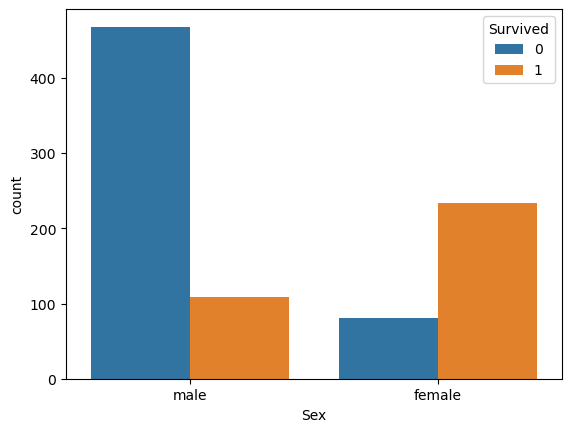

In [46]:
sns.countplot(data = titanic, x = 'Sex' , hue = 'Survived')

In [47]:
table = pd.crosstab(titanic['Survived'], titanic['Sex'])
stats.chi2_contingency(table)

Chi2ContingencyResult(statistic=260.71702016732104, pvalue=1.1973570627755645e-58, dof=1, expected_freq=array([[193.47474747, 355.52525253],
       [120.52525253, 221.47474747]]))

In [50]:
table = pd.crosstab(titanic['SibSp'], titanic['Parch'])
stats.chi2_contingency(table)

Chi2ContingencyResult(statistic=341.6819870377193, pvalue=1.7902298345649077e-51, dof=36, expected_freq=array([[4.62653199e+02, 8.05207632e+01, 5.45903479e+01, 3.41189675e+00,
        2.72951740e+00, 3.41189675e+00, 6.82379349e-01],
       [1.59037037e+02, 2.76790123e+01, 1.87654321e+01, 1.17283951e+00,
        9.38271605e-01, 1.17283951e+00, 2.34567901e-01],
       [2.13063973e+01, 3.70819304e+00, 2.51402918e+00, 1.57126824e-01,
        1.25701459e-01, 1.57126824e-01, 3.14253648e-02],
       [1.21750842e+01, 2.11896745e+00, 1.43658810e+00, 8.97867565e-02,
        7.18294052e-02, 8.97867565e-02, 1.79573513e-02],
       [1.36969697e+01, 2.38383838e+00, 1.61616162e+00, 1.01010101e-01,
        8.08080808e-02, 1.01010101e-01, 2.02020202e-02],
       [3.80471380e+00, 6.62177329e-01, 4.48933782e-01, 2.80583614e-02,
        2.24466891e-02, 2.80583614e-02, 5.61167228e-03],
       [5.32659933e+00, 9.27048260e-01, 6.28507295e-01, 3.92817059e-02,
        3.14253648e-02, 3.92817059e-02, 7.85634119

In [54]:

age = titanic['Age']
std = np.std(age)
n = age.size #개수 
SE = std / np.sqrt(n-1)
# 신뢰구간 계산
confidence_interval = [age.mean() - 1.96 * std / SE, age.mean() + 1.96 * SE]  #sqrt = 루트 
print(f"표본평균: {age.mean()}")
print(f"신뢰구간: {confidence_interval}")

표본평균: 29.69911764705882
신뢰구간: [-28.773303202432274, 30.652830500448662]


In [55]:
s0 = titanic[titanic['Survived']==0]['Age'].dropna()
s1 = titanic[titanic['Survived']==1]['Age'].dropna()
# 단일표본 t검정 
print('사망자 나이')
print(stats.ttest_1samp(s0, titanic['Age'].mean()))
print('생존자 나이')
print(stats.ttest_1samp(s1, titanic['Age'].mean()))

#T검정에서 피벨류가 크다 == 귀무가설 : 모집단의 평균과 표본의 평균이 차이가 없다.
#T검정에서 피벨류가 작다 == 대립가설 : 모집단의 평균과 표본의 평균이 차이가 있다. (유의미하다.)

사망자 나이
TtestResult(statistic=1.3469671652243531, pvalue=0.17871197174919004, df=423)
생존자 나이
TtestResult(statistic=-1.5438553337279275, pvalue=0.12371765152907187, df=289)


In [63]:
s0.mean() , s1.mean() , titanic['Age'].mean()

(30.62617924528302, 28.343689655172415, 29.69911764705882)

<Axes: xlabel='Age', ylabel='Count'>

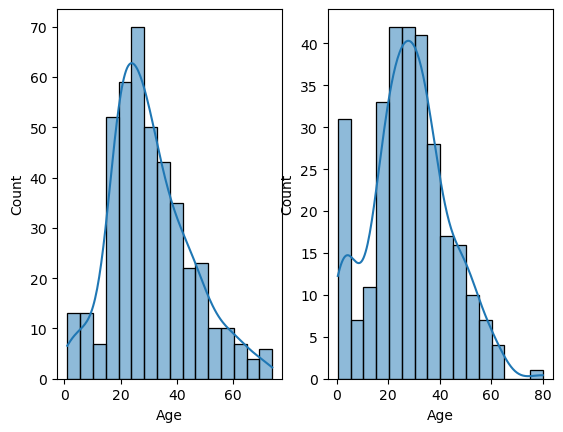

In [64]:
plt.subplot(1,2,1)
sns.histplot(s0, kde=True)
plt.subplot(1,2,2)
sns.histplot(s1, kde=True)

In [65]:
stats.mannwhitneyu(s0, s1) ## 내가 비교분석하고 싶은 집단 두개 를 넣어주면 통계값과 피밸류를 내뱉는다 . (비모수)
# 귀무가설 = 두 집단의 평균 차이가 없다. 0.05보다 크니까 귀무가설이 참 
# 대립가설 = 두 집단의 평균 차이가 있다.

MannwhitneyuResult(statistic=65278.0, pvalue=0.16049252477737763)

In [66]:
print(stats.bartlett(s0, s1))  # 두 집단이 동일한지 확인하는것 / 정규성을 가진다는 전제하에 함. 
#귀무가설 = 두 집단이 등분산을 가진다. 등분산 = 여러 그룹 간의 분산이 동일 피밸류가 크기 때문에 등분산을 가진다 피밸류만 가지고 확인가능 
#대립가설 = 두 집단이 이분산을 가진다. 이분산= 분산이 다르다

BartlettResult(statistic=0.9875502654050705, pvalue=0.32034184898205253)


In [67]:
print(stats.levene(s0, s1))
#귀무가설 = 두 집단이 등분산을 가진다. 등분산 = 여러 그룹 간의 분산이 동일 피밸류가 크기 때문에 등분산을 가진다 피밸류만 가지고 확인가능 
#대립가설 = 두 집단이 이분산을 가진다. 이분산= 분산이 다르다

LeveneResult(statistic=1.1953828843934424, pvalue=0.27461621560000243)


In [68]:
print(stats.fligner(s0, s1))
#귀무가설 = 두 집단이 등분산을 가진다. 등분산 = 여러 그룹 간의 분산이 동일 피밸류가 크기 때문에 등분산을 가진다 피밸류만 가지고 확인가능 
#대립가설 = 두 집단이 이분산을 가진다. 이분산= 분산이 다르다

FlignerResult(statistic=1.0436060696132083, pvalue=0.3069842761053375)


In [ ]:
# t - test

In [69]:
s0.var(), s1.var()  # 분산정도 확인 비슷하면 등분산을 가지고 있다고 볼 수 있다. 

(200.84869836968636, 223.53096523207253)

In [70]:
# 이변량 t - test
stats.ttest_ind(s0, s1, equal_var = True) 

# 대립가설 = 두 집단의 평균 차이가 있다.  <== 현재 잘못된 결과임  // 속지않을 수 있도록 알아두기 

TtestResult(statistic=2.06668694625381, pvalue=0.03912465401348249, df=712.0)

In [71]:
stats.ttest_ind(s0, s1, equal_var = False) 

TtestResult(statistic=2.0460301043939704, pvalue=0.04118965162586639, df=598.841215388818)

<BarContainer object of 2 artists>

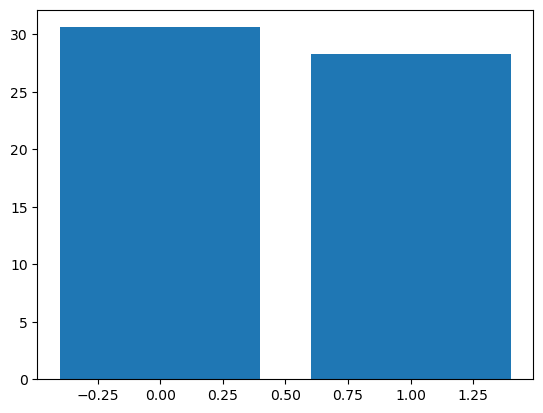

In [92]:
age_mean = titanic.groupby('Survived')['Age'].mean()
plt.bar(x = age_mean.index, height=age_mean)

<Axes: xlabel='Survived', ylabel='Age'>

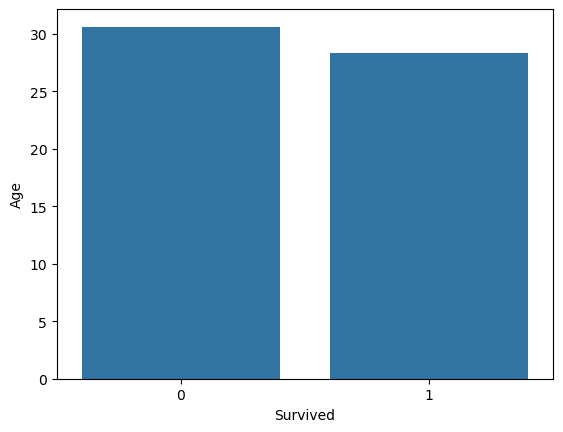

In [89]:
sns.barplot(data = titanic, x = 'Survived' , y = 'Age', errorbar=('ci',0))

In [78]:
# 길쭉한 막대기 까만것은 신뢰구간을 나타냄  errorbar=('ci',0)) 신뢰구간 조정하는 함수  estimator='var' 넣은값의 차이를 그래프로 표현 

<Axes: xlabel='Survived', ylabel='Age'>

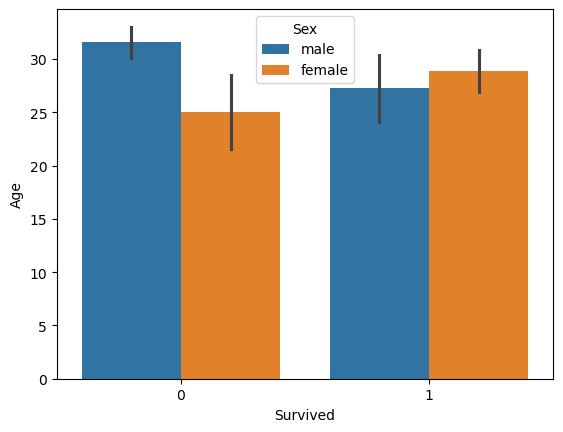

In [93]:
sns.barplot(data = titanic, x = 'Survived' , y = 'Age', hue='Sex')

<Axes: xlabel='Age', ylabel='Density'>

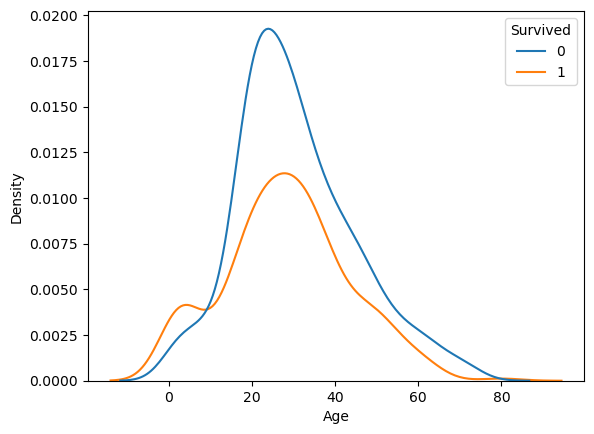

In [102]:
sns.kdeplot(data = titanic, x = 'Age' , hue='Survived')

<Axes: xlabel='Age', ylabel='Count'>

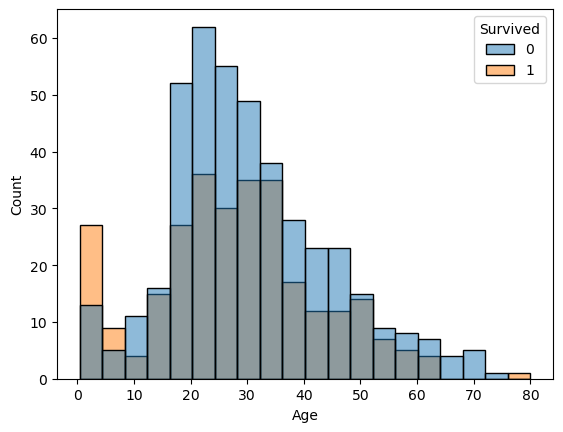

In [104]:
sns.histplot(data = titanic, x = 'Age' , hue='Survived')

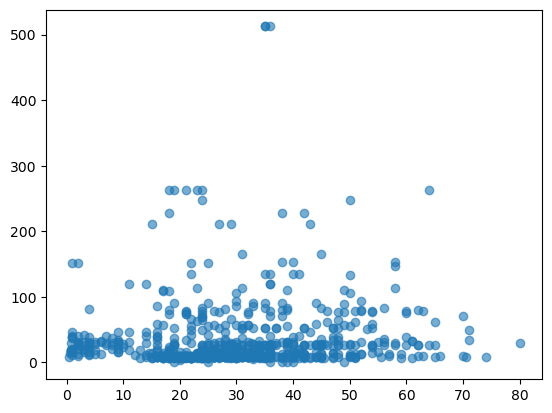

In [110]:
plt.scatter(titanic['Age'],titanic['Fare'], alpha= 0.6)
#  alpha= 0.6 투명도 

<Axes: xlabel='Age'>

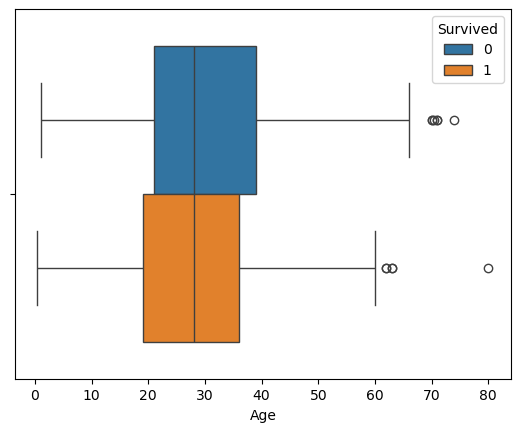

In [112]:
sns.boxplot(data = titanic, x = 'Age' , hue='Survived')